In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [176]:
%matplotlib inline

In [177]:
import os

In [178]:
os.chdir("D:\Cloudyml\Datatrained\DS2405Project\WINE")

In [179]:
os.getcwd()

'D:\\Cloudyml\\Datatrained\\DS2405Project\\WINE'

In [180]:
df = pd.read_csv("wine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [181]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [183]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**variance threshold**

In [184]:
#variance threshold
from sklearn.feature_selection import VarianceThreshold

In [185]:
variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(df)

VarianceThreshold(threshold=0)

In [186]:
variance_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [187]:
columns_to_drop = df.columns[~variance_threshold.get_support()]
columns_to_drop

Index([], dtype='object')

#every thing is okay here

**Variance_inflation_factor**

In [188]:
import warnings
warnings.filterwarnings('ignore')

In [189]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [190]:
X = df.drop("quality",axis=1)
y= df["quality"]


In [191]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [192]:
columns=df.drop("quality",axis=1)
columns.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [193]:
X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [194]:
y.head(2)

0    5
1    5
Name: quality, dtype: int64

In [195]:
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif["Features"] = X.columns


In [196]:
vif
vif.sort_values(by="vif",ascending= False)

,vif,Features
7,1479.287209,density
8,1070.967685,pH
10,124.394866,alcohol
0,74.452265,fixed acidity
9,21.590621,sulphates
1,17.060026,volatile acidity
2,9.183495,citric acid
4,6.554877,chlorides
6,6.519699,total sulfur dioxide
5,6.442682,free sulfur dioxide


In [197]:
# droping density and ph
df=df.drop(["density","pH"],axis=1)

In [198]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.71,10.2,5


**outlier**

In [199]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,2.000000,14.900000,8.000000


fixed acidity              AxesSubplot(0.125,0.53;0.133621x0.35)
volatile acidity        AxesSubplot(0.285345,0.53;0.133621x0.35)
citric acid              AxesSubplot(0.44569,0.53;0.133621x0.35)
residual sugar          AxesSubplot(0.606034,0.53;0.133621x0.35)
chlorides               AxesSubplot(0.766379,0.53;0.133621x0.35)
free sulfur dioxide        AxesSubplot(0.125,0.11;0.133621x0.35)
total sulfur dioxide    AxesSubplot(0.285345,0.11;0.133621x0.35)
sulphates                AxesSubplot(0.44569,0.11;0.133621x0.35)
alcohol                 AxesSubplot(0.606034,0.11;0.133621x0.35)
quality                 AxesSubplot(0.766379,0.11;0.133621x0.35)
dtype: object

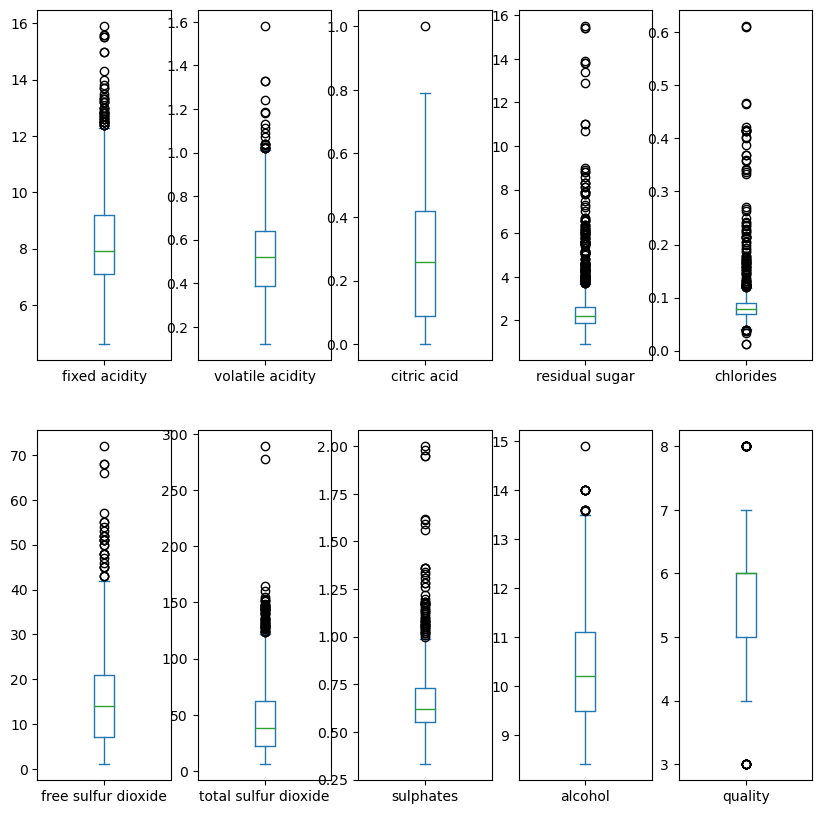

In [200]:
df.plot(kind="box",subplots=True,figsize=(10,10),layout=(2,5))

**Removing outlier**

In [201]:
from scipy.stats import zscore

In [202]:
import numpy as np

In [203]:
zscore(df) # to get zscore of data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,0.305990,-0.209308,-0.787823


In [204]:
z = np.abs(zscore(df)) 
# here "abs" is absolute and it all negative value to positive

In [205]:
threshold=3 # all the value which is bigger than 3 will be removed
# all the value which lies after third quartile

In [206]:
print(np.where(z>3))
# first first array is rows number and second rows number is columns number
# if we combine rows and column number than its our outier list

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         57,   81,   81,   83,   86,   88,   91,   92,  106,  106,  109,
        120,  126,  127,  142,  144,  147,  151,  151,  151,  163,  164,
        169,  169,  181,  199,  226,  226,  240,  243,  244,  258,  258,
        274,  281,  291,  324,  325,  339,  340,  347,  354,  374,  381,
        391,  396,  396,  400,  400,  442,  451,  459,  467,  480,  494,
        515,  517,  544,  554,  555,  557,  568,  584,  588,  591,  595,
        614,  636,  639,  649,  649,  651,  652,  652,  652,  672,  672,
        684,  690,  690,  692,  692,  723,  724,  730,  754,  776,  777,
        795,  821,  832,  899,  911,  917,  923,  925,  926,  982, 1043,
       1051, 1051, 1071, 1074, 1079, 1079, 1081, 1081, 1131, 1154, 1165,
       1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1270, 1288,
       1289, 1295, 1296, 1299, 1299, 1312, 1319, 1319, 1358, 1367, 1370,
       1370, 1372, 1372, 1374, 1374, 1434, 1434, 1

In [207]:
z.iloc[13,7] # more than three

5.32210116796055

In [208]:
z.iloc[1,1] # less than 3

1.9674424541409123

In [209]:
df_new = df[(z<3).all(axis=1)]  # removing outlier

In [210]:
df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5


In [211]:
z.iloc[1,2] # zscore is less than 3

1.3914722776605752

In [212]:
df_new.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.56,9.4,5


**Correlation**

In [213]:
df_corr=df_new.corr()
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
fixed acidity,1.000000,-0.288724,0.694709,0.186178,0.198507,-0.151496,-0.104238,0.203046,-0.042327,0.137441
volatile acidity,-0.288724,1.000000,-0.587104,0.035796,0.081875,0.003280,0.101558,-0.336183,-0.215159,-0.354290
citric acid,0.694709,-0.587104,1.000000,0.188287,0.102888,-0.070494,0.008247,0.300656,0.159411,0.241752
residual sugar,0.186178,0.035796,0.188287,1.000000,0.136816,-0.002452,0.096531,0.080325,0.145222,0.056593
chlorides,0.198507,0.081875,0.102888,0.136816,1.000000,-0.072483,0.029686,0.035781,-0.224910,-0.115553
free sulfur dioxide,-0.151496,0.003280,-0.070494,-0.002452,-0.072483,1.000000,0.663151,0.045058,-0.062227,-0.061568
total sulfur dioxide,-0.104238,0.101558,0.008247,0.096531,0.029686,0.663151,1.000000,-0.048447,-0.236999,-0.229071
sulphates,0.203046,-0.336183,0.300656,0.080325,0.035781,0.045058,-0.048447,1.000000,0.224676,0.377561
alcohol,-0.042327,-0.215159,0.159411,0.145222,-0.224910,-0.062227,-0.236999,0.224676,1.000000,0.496402
quality,0.137441,-0.354290,0.241752,0.056593,-0.115553,-0.061568,-0.229071,0.377561,0.496402,1.000000


In [214]:
import seaborn as sns

<AxesSubplot:>

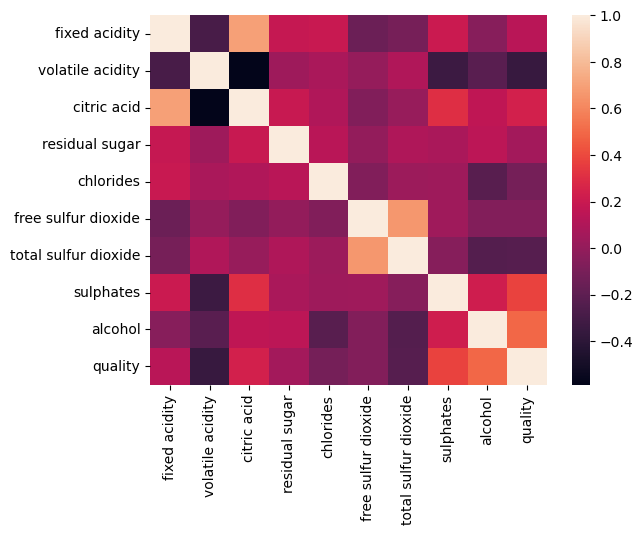

In [215]:
sns.heatmap(df_corr)

In [375]:
x = df_new.drop("volatile acidity",axis=1)

In [376]:
x.head(1)

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.0,1.9,0.076,11.0,34.0,0.56,9.4,5


In [218]:
# Bifricating features and target

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [377]:
X1= x.drop("quality",axis=1)
y= x["quality"]

In [378]:
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=42)

In [379]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1098, 8)
(367, 8)
(1098,)
(367,)


**Naive bayes(MultinomialNB) for more than 2 target**

In [223]:
mnb = MultinomialNB()

In [224]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [225]:
pred = mnb.predict(x_test)

In [226]:
print(accuracy_score(y_test,pred))

0.4332425068119891


In [227]:
print(confusion_matrix(y_test,pred))

[[ 0  5  4  5  1]
 [ 0 71 49 24  2]
 [ 0 53 66 27  0]
 [ 0  5 25 22  4]
 [ 0  1  1  2  0]]


In [228]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        15
           5       0.53      0.49      0.51       146
           6       0.46      0.45      0.45       146
           7       0.28      0.39      0.32        56
           8       0.00      0.00      0.00         4

    accuracy                           0.43       367
   macro avg       0.25      0.27      0.26       367
weighted avg       0.43      0.43      0.43       367



In [229]:
x.head(1)

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.0,1.9,0.076,11.0,34.0,0.56,9.4,5


In [230]:
t = np.array([8.2,0.5,1.5,0.075,13,30,0.70,10])

In [231]:
def predict_mnb(t):
    t=t.reshape(1,-1)
    p=mnb.predict(t)
    print(p)
    if p<4:
        print("good")
    elif p>4 and p<7:
        print("better")
    elif p>7:
        print("best")

In [232]:
predict_mnb(t)

[6]
better


**Descion tree**

In [233]:
from sklearn.tree import DecisionTreeClassifier

In [234]:
dtc = DecisionTreeClassifier()

In [235]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [236]:
pred = dtc.predict(x_test)

In [237]:
pred

array([6, 7, 5, 5, 5, 6, 5, 4, 5, 6, 7, 7, 5, 5, 6, 5, 7, 6, 6, 5, 5, 7,
       7, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 4,
       5, 5, 7, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 7, 5, 5, 5, 5, 7, 6,
       6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5,
       6, 5, 5, 5, 7, 5, 5, 7, 6, 5, 6, 5, 6, 6, 6, 7, 7, 7, 5, 6, 5, 5,
       6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 7, 6, 6, 6, 6, 6, 5,
       7, 5, 5, 6, 5, 6, 7, 5, 5, 7, 6, 5, 5, 6, 7, 5, 6, 4, 6, 6, 7, 6,
       6, 5, 5, 5, 5, 6, 6, 7, 4, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6,
       5, 6, 5, 5, 6, 8, 5, 5, 6, 6, 5, 7, 5, 5, 5, 6, 6, 7, 5, 5, 5, 6,
       5, 6, 7, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 7, 6, 5, 7, 5, 6, 5, 5, 5,
       6, 5, 6, 5, 5, 5, 6, 5, 5, 4, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6,
       6, 6, 5, 7, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 6, 6, 6, 7, 5, 6, 5, 5,
       5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 7, 4, 5, 6, 6,
       6, 5, 7, 6, 7, 6, 5, 7, 5, 5, 6, 5, 6, 5, 6,

In [238]:
accuracy_score(y_test,pred)

0.5749318801089919

In [239]:
confusion_matrix(y_test,pred)

array([[  1,   9,   5,   0,   0],
       [  3, 103,  37,   3,   0],
       [  2,  45,  86,  12,   1],
       [  1,   8,  26,  20,   1],
       [  0,   0,   0,   3,   1]], dtype=int64)

In [240]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           4       0.14      0.07      0.09        15
           5       0.62      0.71      0.66       146
           6       0.56      0.59      0.57       146
           7       0.53      0.36      0.43        56
           8       0.33      0.25      0.29         4

    accuracy                           0.57       367
   macro avg       0.44      0.39      0.41       367
weighted avg       0.56      0.57      0.56       367



**SVM**

In [241]:
from sklearn.svm import SVC

In [242]:
svc = SVC()

In [243]:
svc.fit(x_train,y_train)

SVC()

In [244]:
svcpred = svc.predict(x_test)

In [245]:
accuracy_score(y_test,svcpred)

0.4550408719346049

In [246]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           4       0.14      0.07      0.09        15
           5       0.62      0.71      0.66       146
           6       0.56      0.59      0.57       146
           7       0.53      0.36      0.43        56
           8       0.33      0.25      0.29         4

    accuracy                           0.57       367
   macro avg       0.44      0.39      0.41       367
weighted avg       0.56      0.57      0.56       367



In [247]:
confusion_matrix(y_test,pred)

array([[  1,   9,   5,   0,   0],
       [  3, 103,  37,   3,   0],
       [  2,  45,  86,  12,   1],
       [  1,   8,  26,  20,   1],
       [  0,   0,   0,   3,   1]], dtype=int64)

In [248]:
svc = SVC(kernel="poly")

In [249]:
svc.fit(x_train,y_train)

SVC(kernel='poly')

In [250]:
svcpred = svc.predict(x_test)

In [251]:
accuracy_score(y_test,svcpred)

0.45776566757493187

In [252]:
confusion_matrix(y_test,pred)

array([[  1,   9,   5,   0,   0],
       [  3, 103,  37,   3,   0],
       [  2,  45,  86,  12,   1],
       [  1,   8,  26,  20,   1],
       [  0,   0,   0,   3,   1]], dtype=int64)

In [253]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           4       0.14      0.07      0.09        15
           5       0.62      0.71      0.66       146
           6       0.56      0.59      0.57       146
           7       0.53      0.36      0.43        56
           8       0.33      0.25      0.29         4

    accuracy                           0.57       367
   macro avg       0.44      0.39      0.41       367
weighted avg       0.56      0.57      0.56       367



**Bagging**

In [254]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
'''A dictionary with base_estimator__max_depth from 1 to 20 with step size as 5
A max_samples with [0.05, 0.1, 0.2, 0.5] and max_features form 1 to 20 with step size as 5'''

param_grid = { 'criterion':['gini','entropy'],'base_estimator__max_depth':[1,5,10,15,20],'max_samples': [0.05,0.1,0.2,0.5],'max_features':[1,5,10,15,20]}



In [255]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.71,10.2,5


**Grid searchcv With decision tree**

In [268]:
from sklearn.tree import DecisionTreeClassifier

In [269]:
DCT =  DecisionTreeClassifier()

In [280]:
X = df.drop("quality",axis=1)
y= df["quality"]

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [298]:
grid_param = { 'criterion':['gini','entropy'],
              'min_samples_leaf':range(1,10,1),
              'max_depth':range(2,20,2)}


**Mough up all the estimator of gridserachcv of classifier life deciosntree, gradient boosting,randomforest. it is used for selecting best parameters**

In [299]:
grid_search = GridSearchCV(estimator=DCT,param_grid=grid_param,cv=5,n_jobs=-1)

In [300]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 10)})

In [302]:
best_parameters = grid_search.best_params_

In [303]:
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1}


In [304]:
dct = DecisionTreeClassifier(criterion="entropy",max_depth=18,min_samples_leaf=1)

In [305]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=18)

In [306]:
dct.score(X_test,y_test)

0.5854166666666667

**Grid search CV with Random forest** Dont run it it take so much time here

In [314]:
grid_param = {"n_estimators":[90,100,115,130],"criterion":["gini", "entropy"],
             "max_depth":range(2,20,1),"min_samples_leaf":range(1,10,1),
             "min_samples_split":range(2,10,1),"max_features":["sqrt","log2"]}

In [315]:
from sklearn.ensemble import RandomForestClassifier

In [320]:
b = RandomForestClassifier()

In [317]:
grid_search = GridSearchCV(estimator=b,param_grid=grid_param,cv=5,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
best_parameters = grid_search.best_params_ # selecting best parameter

**KNNclassifier**

In [327]:
from sklearn.neighbors import KNeighborsClassifier

In [350]:
parameters_KNN = {
    'n_neighbors': range(1,10, 1),
    'leaf_size': range(20,40,1),
    'p': [2],
    'weights': ['uniform'],
    'metric': ['minkowski']}

In [345]:
KNN =  KNeighborsClassifier()

In [351]:
grid_search = GridSearchCV(estimator=KNN,param_grid=parameters_KNN,cv=5,n_jobs=-1)

In [352]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': range(20, 40), 'metric': ['minkowski'],
                         'n_neighbors': range(1, 10), 'p': [2],
                         'weights': ['uniform']})

In [353]:
best_parameters = grid_search.best_params_

In [354]:
print(best_parameters)

{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


In [355]:
knn = KNeighborsClassifier(leaf_size=20,metric='minkowski',n_neighbors=1,p=2,weights="uniform")

In [356]:
knn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=1)

In [357]:
knn.score(x_train,y_train)

1.0

**SVMclassifier**

In [380]:
from sklearn.svm import SVC

In [394]:
svc_para = {"kernel":["linear"],
           "C" :[2],
           "gamma":["scale"],
           "degree":[3],
           "coef0":[2]}

In [395]:
SVC1 = SVC()

In [396]:
grid_search = GridSearchCV(estimator=SVC1,param_grid=svc_para,cv=5,n_jobs=-1)

In [397]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [2], 'coef0': [2], 'degree': [3],
                         'gamma': ['scale'], 'kernel': ['linear']})

In [398]:
best_parameters = grid_search.best_params_

In [399]:
print(best_parameters)

{'C': 2, 'coef0': 2, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}


In [401]:
svc2 =SVC(C=2,coef0=2,degree=3,gamma="scale",kernel="linear")

In [402]:
svc2.fit(x_train,y_train)

SVC(C=2, coef0=2, kernel='linear')

In [403]:
svc2.score(x_train,y_train)

0.604735883424408